[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ArtIC-TITECH/b3-proj-2024/blob/main/docs/theme_B.ipynb)

# 学習率とバッチサイズの精度への影響評価

## 学習率とバッチサイズを変えた際の精度

以下のセルはMNISTで学習率とバッチサイズを変化させた際の精度を評価します。

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:02<00:00, 4593214.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 132931.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1082248.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4394585.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training with Batch Size = 32, Learning Rate = 0.001
Epoch [1/5], Loss: 1.5819, Accuracy: 61.57%
Epoch [2/5], Loss: 0.7624, Accuracy: 83.24%
Epoch [3/5], Loss: 0.5499, Accuracy: 86.34%
Epoch [4/5], Loss: 0.4667, Accuracy: 87.66%
Epoch [5/5], Loss: 0.4220, Accuracy: 88.62%
Training with Batch Size = 32, Learning Rate = 0.01
Epoch [1/5], Loss: 0.5728, Accuracy: 84.75%
Epoch [2/5], Loss: 0.3134, Accuracy: 90.82%
Epoch [3/5], Loss: 0.2701, Accuracy: 92.26%
Epoch [4/5], Loss: 0.2366, Accuracy: 93.15%
Epoch [5/5], Loss: 0.2097, Accuracy: 94.00%
Training with Batch Size = 32, Learning Rate = 0.1
Epoch [1/5], Loss: 0.3342, Accuracy: 89.38%
Epoch [2/5], Loss: 0.1557, Accuracy: 95.19%
Epoch [3/5], Loss: 0.1198, Accuracy: 96.31%
Epoch [4/5], Loss: 0.0979, Accuracy: 96.98%
Epoch [5/5], Loss: 0.0842, Accuracy: 97.37%
Training with Batch Size = 32, Learning Rate = 0.2
Epoch [1/5], Loss: 1.8782, Accuracy: 32.47%
Epoch [2/5], L

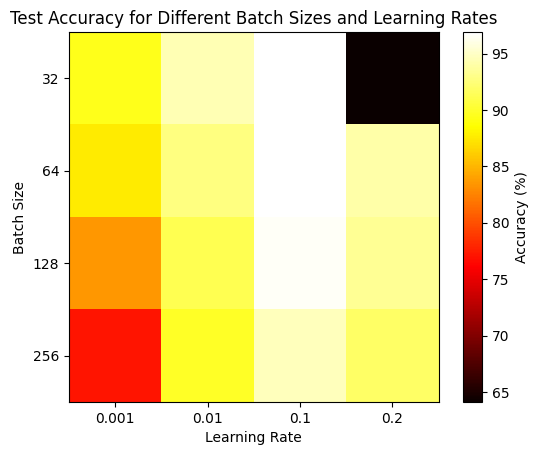

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# MNISTデータセットのロードと前処理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# バッチサイズと学習率の候補を設定
batch_sizes = [32, 64, 128, 256]
learning_rates = [0.001, 0.01, 0.1, 0.2]
results = {}

# 線形モデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # 入力層 -> 隠れ層
        self.fc2 = nn.Linear(128, 10)     # 隠れ層 -> 出力層

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# トレーニング関数
def train_and_evaluate(batch_size, learning_rate):
    # モデル、ロス関数、オプティマイザーの準備
    model = SimpleNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # DataLoaderの準備
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # トレーニングループ
    epochs = 5
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # テストデータでの評価
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_accuracy = 100 * correct / total
    return test_accuracy

# 実験設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Training with Batch Size = {batch_size}, Learning Rate = {lr}")
        test_accuracy = train_and_evaluate(batch_size, lr)
        results[(batch_size, lr)] = test_accuracy

# 結果を表示
print("\nExperiment Results:")
for (batch_size, lr), accuracy in results.items():
    print(f"Batch Size: {batch_size}, Learning Rate: {lr}, Test Accuracy: {accuracy:.2f}%")

# 結果の可視化
accuracy_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
for i, batch_size in enumerate(batch_sizes):
    for j, lr in enumerate(learning_rates):
        accuracy_matrix[i, j] = results[(batch_size, lr)]

plt.imshow(accuracy_matrix, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(learning_rates)), learning_rates)
plt.yticks(np.arange(len(batch_sizes)), batch_sizes)
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.title('Test Accuracy for Different Batch Sizes and Learning Rates')
plt.colorbar(label='Accuracy (%)')
plt.show()


バッチサイズが大きいと局所解に陥りやすくなります。

## 動的なバッチサイズ変更

バッチサイズを少しずつ大きくする処理は以下のように実装出来ます。

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time  # 時間計測用のライブラリ

# MNISTデータセットのロードと前処理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# バッチサイズと学習率の設定
initial_batch_size = 32
max_batch_size = 256
learning_rate = 0.1

# モデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # 入力層 -> 隠れ層
        self.fc2 = nn.Linear(128, 10)     # 隠れ層 -> 出力層

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# トレーニング関数
def train_and_evaluate(batch_size, model, criterion, optimizer, train_loader, test_loader, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    print(f"Loss: {running_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # テストデータでの評価
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_accuracy = 100 * correct / total
    return test_accuracy

# 動的にバッチサイズを変更する関数
def dynamic_batch_size_train(initial_batch_size, max_batch_size, model, criterion, optimizer, epochs, device):
    current_batch_size = initial_batch_size
    train_loader = DataLoader(train_dataset, batch_size=current_batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=current_batch_size, shuffle=False)

    for epoch in range(epochs):
        start_time = time.time()  # エポック開始時刻を記録
        print(f"\nEpoch {epoch + 1}/{epochs} with Batch Size: {current_batch_size}")

        # トレーニングと評価を実行
        test_accuracy = train_and_evaluate(current_batch_size, model, criterion, optimizer, train_loader, test_loader, device)

        end_time = time.time()  # エポック終了時刻を記録
        epoch_time = end_time - start_time  # 学習にかかった時間（秒）

        print(f"Epoch Time: {epoch_time:.2f} seconds")

        # バッチサイズの増加条件
        if current_batch_size < max_batch_size:
            current_batch_size *= 2  # バッチサイズを倍にする
            train_loader = DataLoader(train_dataset, batch_size=current_batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=current_batch_size, shuffle=False)

# 訓練の設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# トレーニングの実行
epochs = 5
dynamic_batch_size_train(initial_batch_size, max_batch_size, model, criterion, optimizer, epochs, device)



Epoch 1/5 with Batch Size: 32
Loss: 0.3404, Accuracy: 89.20%
Epoch Time: 16.87 seconds

Epoch 2/5 with Batch Size: 64
Loss: 0.1332, Accuracy: 95.98%
Epoch Time: 14.73 seconds

Epoch 3/5 with Batch Size: 128
Loss: 0.0983, Accuracy: 97.08%
Epoch Time: 14.05 seconds

Epoch 4/5 with Batch Size: 256
Loss: 0.0843, Accuracy: 97.50%
Epoch Time: 13.65 seconds

Epoch 5/5 with Batch Size: 256
Loss: 0.0798, Accuracy: 97.66%
Epoch Time: 13.69 seconds
